In [8]:
import os
import numpy as np
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
import pandas as pd
import seaborn as sn
import torch
import pickle

In [9]:
data_dir = os.path.join('../../data')
pkl = pickle.load(open(os.path.join(data_dir, 'scales_resnet18_W4ANone.pkl'), 'rb'))

In [10]:
pkl

{'l3': {'alpha': array([0.40903422, 0.25217265, 0.3865223 , 0.22463126, 0.21177116,
         0.21325131, 0.49626967, 0.2115541 , 0.15770206, 0.18008801,
         0.1520916 , 0.17595476, 0.13037018, 0.11650364, 0.10232696,
         0.09274771, 0.23300217, 0.08036037], dtype=float32),
  'acc': 57.252,
  'loss': 1.9610435962677002},
 'l2.5': {'alpha': array([0.345598  , 0.20538326, 0.3239698 , 0.19839633, 0.18888971,
         0.17696483, 0.40757832, 0.17441024, 0.13151811, 0.14830677,
         0.12503253, 0.1544416 , 0.10631854, 0.09199565, 0.08171667,
         0.0701294 , 0.16337746, 0.06321323], dtype=float32),
  'acc': 56.084,
  'loss': 1.9712408781051636},
 'cd': {'alpha': array([0.37581727, 0.367353  , 0.405134  , 0.42064518, 0.14549376,
         0.39066353, 0.6149767 , 0.29006162, 0.39120075, 0.37862122,
         0.13668086, 0.12856407, 0.12685598, 0.21122947, 0.1132054 ,
         0.11050481, 0.1598692 , 0.18193819], dtype=float32),
  'acc': 53.358,
  'loss': 1.9753367900848389},
 '

In [12]:
pkl['max']['alpha']

array([0.799308  , 0.4879139 , 0.64911854, 0.3806115 , 0.34053823,
       0.42715994, 0.78022724, 0.43874824, 0.35565758, 0.3919502 ,
       0.33351418, 0.26765007, 0.29604152, 0.3295469 , 0.38262123,
       0.34872046, 0.74717015, 0.26581714], dtype=float32)

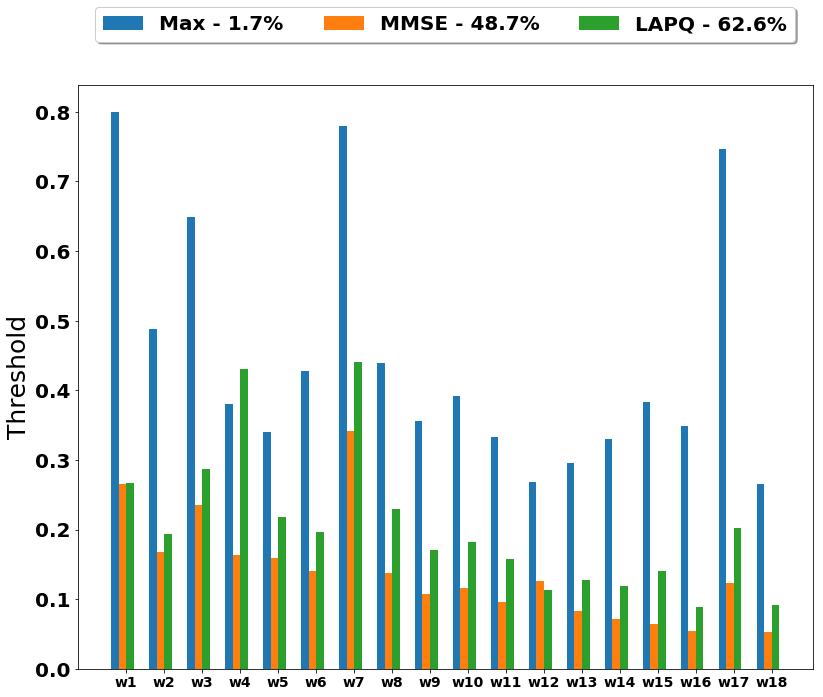

In [69]:
rcParams['figure.figsize'] = 12, 10
font = {'weight' : 'normal', 'size': 20, 'weight': 'bold'}
matplotlib.rc('font', **font)


data_max = pkl['max']['alpha']
data_l2 = pkl['l2']['alpha']
data_powell = pkl['powell']['alpha']
data_cd = pkl['cd']['alpha']

acc_l2 = pkl['l2']['acc']
acc_powell = pkl['powell']['acc']
acc_cd = pkl['cd']['acc']

N = len(data)
ind = np.arange(N)    # the x locations for the groups
width = 0.2       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, data_max, width)
p2 = plt.bar(ind + width, data_l2, width)
p2 = plt.bar(ind + 2*width, data_powell, width)
# p2 = plt.bar(ind + 3*width, data_cd, width)
plt.ylabel('Threshold', fontsize=25)
plt.legend(['Max - {:.1f}%'.format(1.7), 'MMSE - {:.1f}%'.format(acc_l2), 'LAPQ - {:.1f}%'.format(acc_powell)], loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=True)


plt.xticks(ind + 1.5*width, ['w{}'.format(i) for i in range(1, len(data_max)+1)], fontsize=14);

plt.tight_layout()
plt.savefig('../../fig/res18_weights_thresholds.png')